In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("mushrooms.csv")

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## No visible order feature in the dataset, all data columns can be considered nominal

### We can decide our target feature to be class edible and poisonous

In [5]:
data.shape

(8124, 23)

In [6]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:>

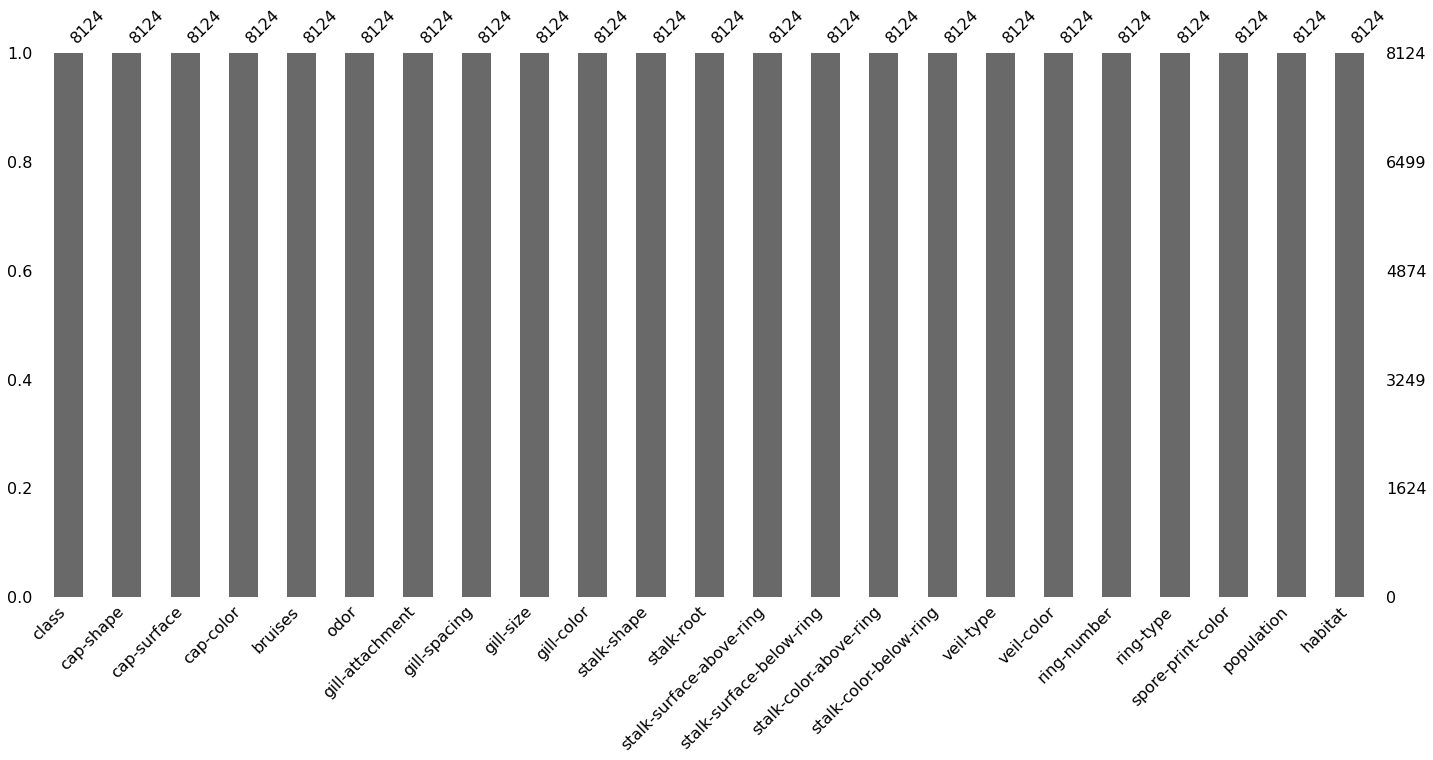

In [7]:
import missingno as msno
msno.bar(data)

### No missing data present in all the columns, comprehensive dataset

Text(0.5, 0, 'class of mushrooms')

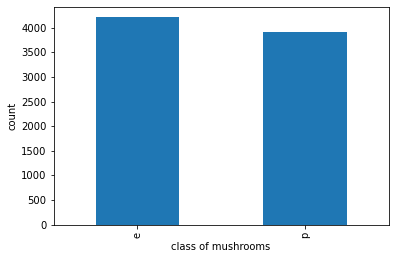

In [8]:
import matplotlib.pyplot as plt
pd.Series(data['class'].value_counts().sort_index().plot(kind='bar'))
plt.ylabel("count")
plt.xlabel("class of mushrooms")

### Target variable is quite balanced

## Exploratory Data Analysis

In [9]:
## Lets compare each field to target field and find relations

In [10]:
data.groupby(['cap-shape'])['class'].value_counts().to_frame()

class
cap-shape class       
b         e        404
          p         48
c         p          4
f         e       1596
          p       1556
k         p        600
          e        228
s         e         32
x         e       1948
          p       1708

### Cap - shape

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


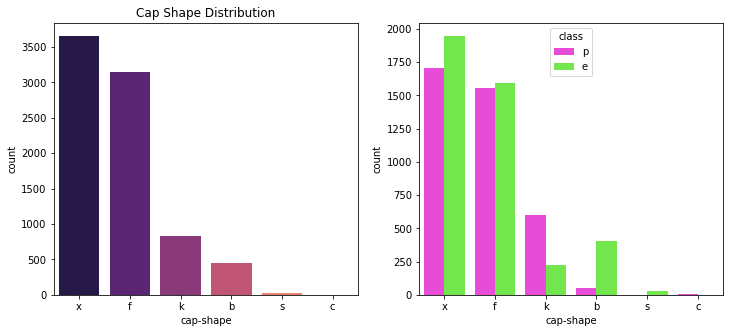

In [11]:
import seaborn as sns
fig,axarr = plt.subplots(1,2,figsize=(12,5))
plot1 = sns.countplot(data['cap-shape'], ax=axarr[0], order=data['cap-shape'].value_counts().index, palette="magma").set_title('Cap Shape Distribution')
plot2 = sns.countplot(x="cap-shape",data=data, hue="class", palette=('#FF33EC','#65FF33'), order=data['cap-shape'].value_counts().index, ax=axarr[1]).set_ylabel('count')

In [12]:
## X and F cap shaped mushrooms comprise of the majority of the mushrooms present in the dataset
# K shape mushrooms have more poisonous types
# B shaped mushroom shave more edible types
# S shaped mushrooms are all edible - most friendliest

### Cap-surface

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


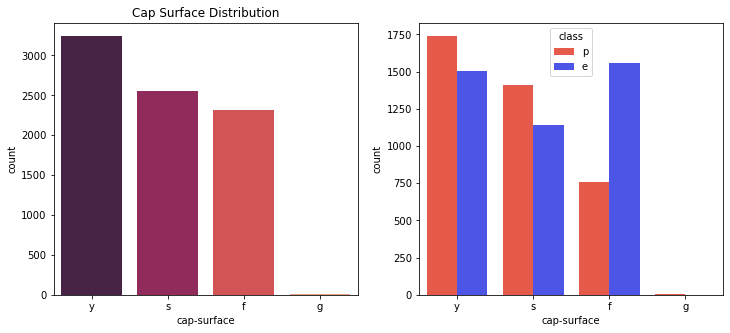

In [13]:
fig,axarr=plt.subplots(1,2,figsize=(12,5))
plot1 = sns.countplot(data['cap-surface'],ax=axarr[0], order=data['cap-surface'].value_counts().index, palette="rocket").set_title("Cap Surface Distribution")
plot2 = sns.countplot(x="cap-surface", data=data, hue="class", palette=('#FF4533','#333EFF'), order=data['cap-surface'].value_counts().index, ax=axarr[1]).set_ylabel('count')

In [14]:
## Y and S surface have higher surface distribution in the dataset
## F cap surface have the highest friendly type shrooms
## Y and S also have high poisonous type shrooms

### Cap Color

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


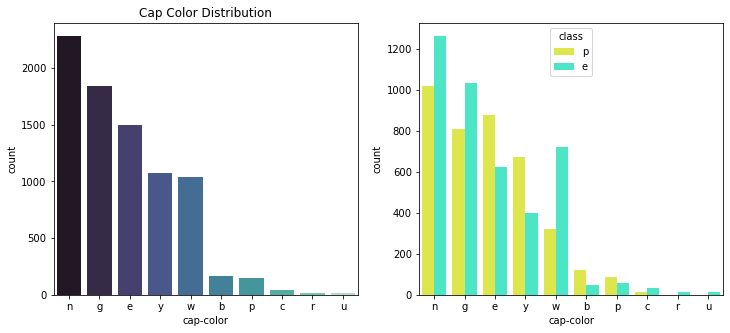

In [15]:
fig,axarr=plt.subplots(1,2,figsize=(12,5))
plot1=sns.countplot(data['cap-color'], ax=axarr[0], order=data['cap-color'].value_counts().index, palette="mako").set_title("Cap Color Distribution")
plot2=sns.countplot(x="cap-color",ax=axarr[1], data=data,order=data['cap-color'].value_counts().index,hue="class",palette=('#F3FF33','#33FFD5')).set_ylabel('count')

In [16]:
## N colour and G colour is high in the dataset
## U and R color mushrooms are friendly and edible

###  Bruises

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


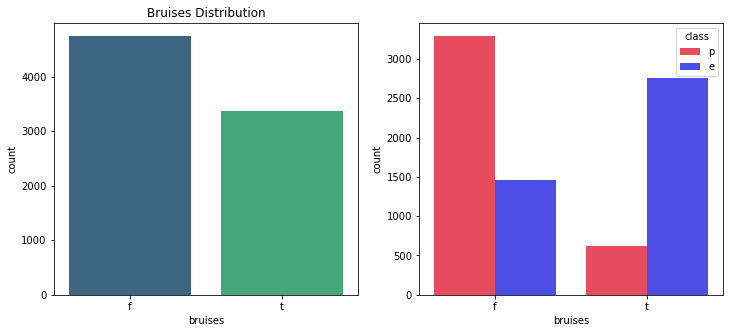

In [17]:
fig,axarr=plt.subplots(1,2,figsize=(12,5))
plot1=sns.countplot(data['bruises'],ax=axarr[0],order=data['bruises'].value_counts().index,palette="viridis").set_title("Bruises Distribution")
plot2=sns.countplot(x="bruises",data=data,order=data['bruises'].value_counts().index,palette=('#FF3349','#3335FF'),hue='class').set_ylabel('count')

In [18]:
## f type bruises are more common and it has more dangerous poisonous mushrooms
## t type bruiese have more edible friendly type mushrooms

### Ordour

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


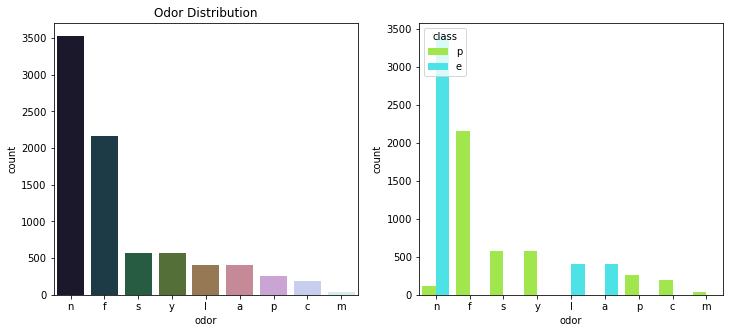

In [19]:
fig,axarr=plt.subplots(1,2,figsize=(12,5))
plot1=sns.countplot(data['odor'], ax=axarr[0], order=data['odor'].value_counts().index, palette="cubehelix").set_title("Odor Distribution")
plot2=sns.countplot(data=data,x="odor",hue="class",order=data['odor'].value_counts().index,palette=('#A3FF33','#33FAFF')).set_ylabel('count')

In [20]:
## No ordor mushrooms are high in the dataset
## NO Ordor mushrooms also have the highest edible types
## Very clear that Foul smell, S, Y, P and C type ordor mushrooms are highly poisonous
## From this graph it is clear that ordor has a high correlation to mushrooms being in each class

### Gill Attachement

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


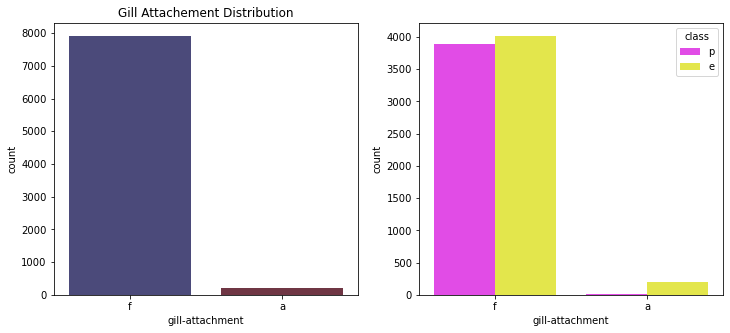

In [21]:
fig,axarr=plt.subplots(1,2,figsize=(12,5))
plot1=sns.countplot(data['gill-attachment'],ax=axarr[0],order=data['gill-attachment'].value_counts().index,palette="icefire").set_title("Gill Attachement Distribution")
plot2=sns.countplot(data=data,ax=axarr[1],x="gill-attachment",hue="class",order=data['gill-attachment'].value_counts().index,palette=('#F933FF','#FCFF33')).set_ylabel('count')

In [22]:
## Gill Attachment f type has highest no of variety in the dataset
## Gill Attachment f type has mixed edible and poisonous types
## Gill Attachment a type has higher no of edible mushrooms
## Gill Attachment if not a significant factor in classifying edible and poisonous types of shrooms as seen from this plot.

### Gill - Spacing

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


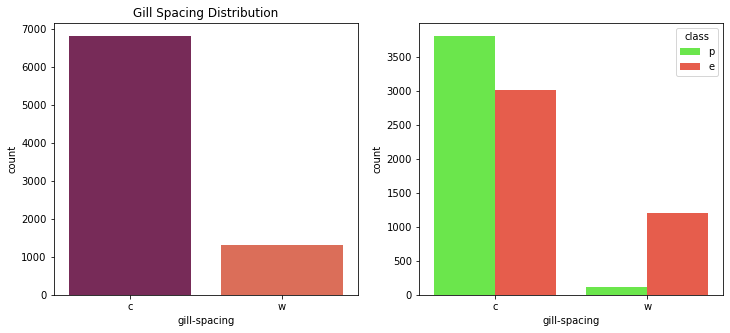

In [23]:
fig,axarr=plt.subplots(1,2,figsize=(12,5))
plot1=sns.countplot(data['gill-spacing'],order=data['gill-spacing'].value_counts().index,ax=axarr[0],palette="rocket").set_title("Gill Spacing Distribution")
plot2=sns.countplot(data=data,ax=axarr[1],x="gill-spacing",hue="class",order=data['gill-spacing'].value_counts().index,palette=('#5CFF33','#FF4933')).set_ylabel('count')

In [24]:
## C Gill spacing has the highest majority
## W Gill spacing has the highest edible type shrooms

### Gill Size

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


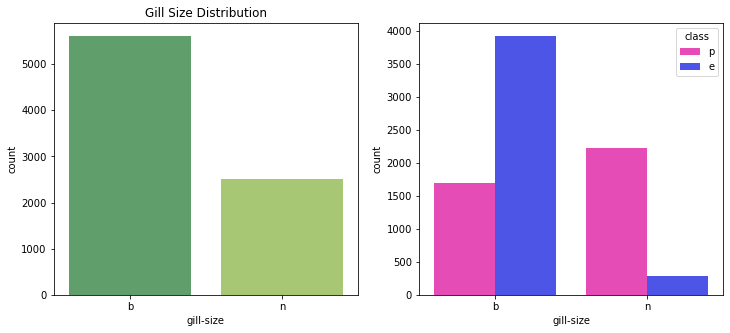

In [25]:
fig,axarr=plt.subplots(1,2,figsize=(12,5))
plot1=sns.countplot(data['gill-size'],ax=axarr[0],order=data['gill-size'].value_counts().index,palette="summer").set_title("Gill Size Distribution")
plot2=sns.countplot(data=data,ax=axarr[1],hue="class",order=data['gill-size'].value_counts().index,x="gill-size",palette=('#FF33BE','#333EFF')).set_ylabel('count')

In [26]:
## Gill-Size B has the majority in the dataset
## Most n size shroom are poisonous while most B size shrooms are edible

### Gill Color

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


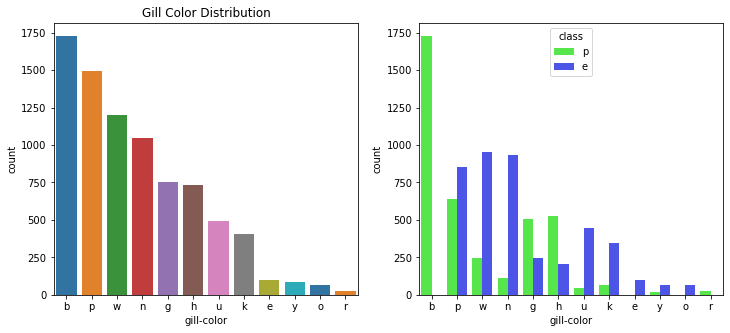

In [27]:
fig,axarr=plt.subplots(1,2,figsize=(12,5))
plot1=sns.countplot(data['gill-color'],order=data['gill-color'].value_counts().index,ax=axarr[0],palette="tab10").set_title("Gill Color Distribution")
plot2=sns.countplot(data=data,x="gill-color",ax=axarr[1],hue="class",order=data['gill-color'].value_counts().index,palette=("#40FF33","#333EFF")).set_ylabel('count')

In [28]:
## Intersting to see all the B gill color shrooms are poisonous showing high correlation
## Dataset is also heavy in B gill colored shrooms

### Stalk Shape

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


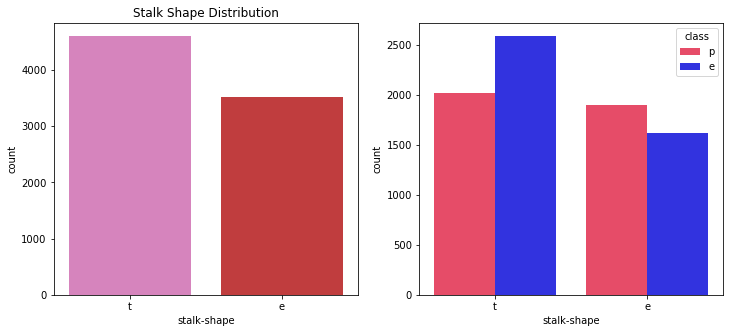

In [29]:
fig,axarr=plt.subplots(1,2,figsize=(12,5))
plot1=sns.countplot(data['stalk-shape'],ax=axarr[0],order=data['stalk-shape'].value_counts().index,palette="tab10_r").set_title("Stalk Shape Distribution")
plot2=sns.countplot(data=data,x="stalk-shape",ax=axarr[1],order=data['stalk-shape'].value_counts().index,hue="class",palette=('#FF3358','#1517FC')).set_ylabel('count')

In [30]:
## t stalk shape mushrooms with majority is edible.

### Stalk Root

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


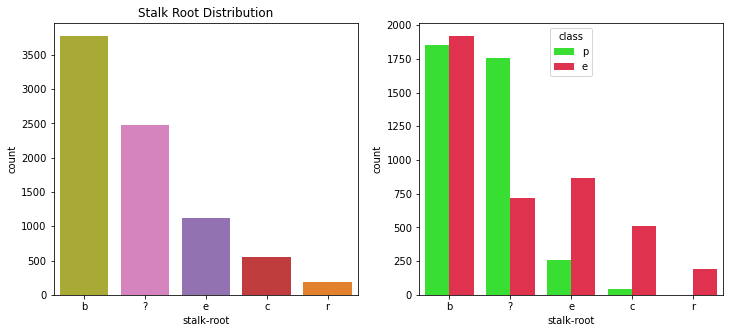

In [31]:
fig,axarr=plt.subplots(1,2,figsize=(12,5))
plot1=sns.countplot(data['stalk-root'],order=data['stalk-root'].value_counts().index,ax=axarr[0],palette="tab10_r").set_title("Stalk Root Distribution")
plot2=sns.countplot(data=data,x="stalk-root",hue="class",order=data['stalk-root'].value_counts().index,ax=axarr[1],palette=('#1DFC15','#FC153B')).set_ylabel('count')

In [32]:
### b stalk root has majority distribution in the dataset
### There is a stalk root without a name tag

### Stalk Surface Above Ring

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


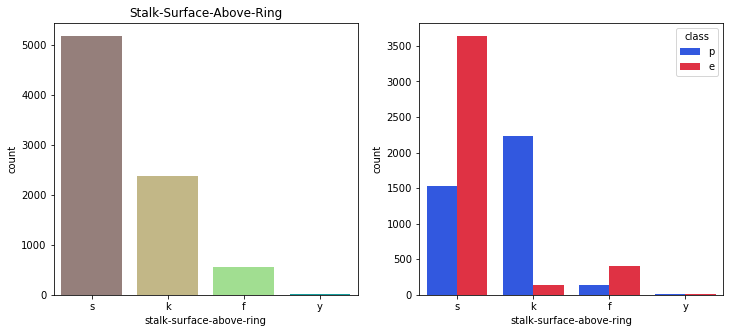

In [33]:
fig,axarr=plt.subplots(1,2,figsize=(12,5))
plot1=sns.countplot(data['stalk-surface-above-ring'],ax=axarr[0],order=data['stalk-surface-above-ring'].value_counts().index,palette="terrain_r").set_title("Stalk-Surface-Above-Ring")
plot2=sns.countplot(data=data,x="stalk-surface-above-ring",ax=axarr[1],order=data['stalk-surface-above-ring'].value_counts().index,hue="class",palette=('#1548FC','#FC152D')).set_ylabel('count')

In [34]:
## Most S stalk type mushrooms as present in the dataset is edible

In [35]:
columns=list(data.columns.values)

In [36]:
print(columns)

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


### Stalk Surface Below Ring

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


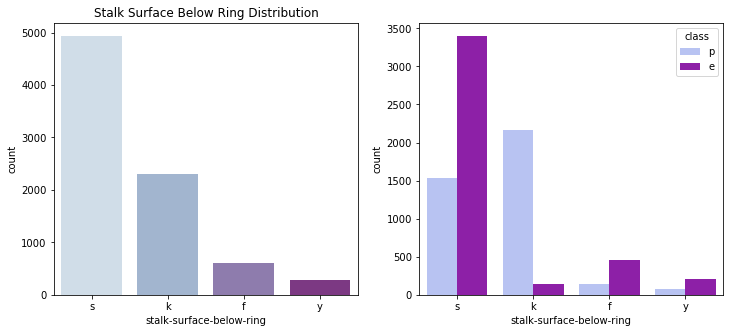

In [37]:
fig,axarr=plt.subplots(1,2,figsize=(12,5))
plot1=sns.countplot(data['stalk-surface-below-ring'],ax=axarr[0],order=data['stalk-surface-below-ring'].value_counts().index,palette="BuPu").set_title("Stalk Surface Below Ring Distribution")
plot2=sns.countplot(data=data,x="stalk-surface-below-ring",hue="class",order=data['stalk-surface-below-ring'].value_counts().index,palette=('#AFBDFB','#9B0ABD')).set_ylabel('count')

In [38]:
#s stalk type surface below ring is mostly edible

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Stalk Color Above Ring

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


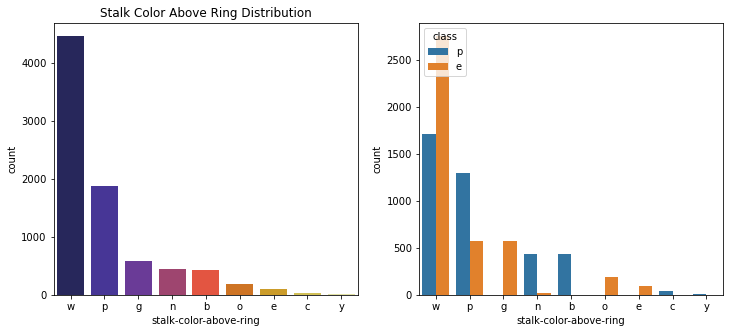

In [41]:
fig,axarr=plt.subplots(1,2,figsize=(12,5))
plot1=sns.countplot(data['stalk-color-above-ring'],ax=axarr[0],order=data['stalk-color-above-ring'].value_counts().index,palette="CMRmap").set_title("Stalk Color Above Ring Distribution")
plot2=sns.countplot(data=data,x="stalk-color-above-ring",hue="class",ax=axarr[1],order=data['stalk-color-above-ring'].value_counts().index).set_ylabel("count")

In [42]:
# White stalk color above ring has the majority and most edible type

### Stalk Color Below Ring

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


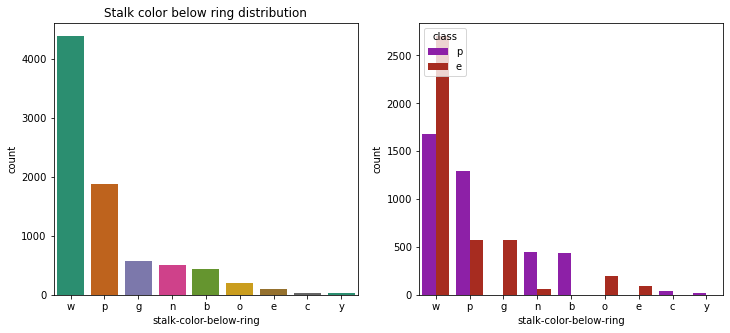

In [43]:
fig,axarr=plt.subplots(1,2,figsize=(12,5))
plot1=sns.countplot(data['stalk-color-below-ring'],ax=axarr[0],order=data['stalk-color-below-ring'].value_counts().index,palette="Dark2").set_title("Stalk color below ring distribution")
plot2=sns.countplot(data=data,x="stalk-color-below-ring",hue="class",ax=axarr[1],order=data['stalk-color-below-ring'].value_counts().index,palette=('#9B0ABD','#BD1A0A')).set_ylabel('count')

In [44]:
### Stalk color W has higher volume in dataset and it has an edible majority as well.
### B stalk color had only poisonous variety

### Veil Type

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


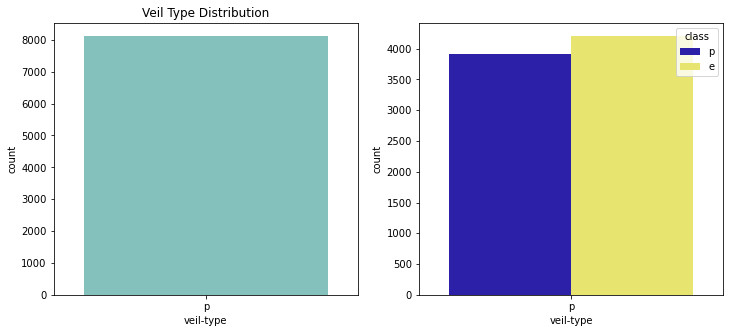

In [45]:
fig,axarr=plt.subplots(1,2,figsize=(12,5))
plot1=sns.countplot(data['veil-type'],ax=axarr[0],order=data['veil-type'].value_counts().index,palette="GnBu").set_title("Veil Type Distribution")
plot2=sns.countplot(data=data,x="veil-type",hue="class",order=data['veil-type'].value_counts().index,palette=('#180ABD','#FBF85C')).set_ylabel('count')

In [46]:
### This column type has only one variable, its not a significant columns for model prediction.

### Veil Color

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


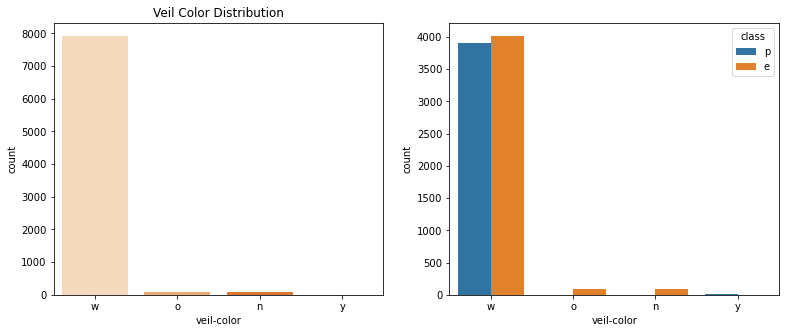

In [47]:
fig,axarr=plt.subplots(1,2,figsize=(13,5))
plot1=sns.countplot(data['veil-color'],ax=axarr[0],order=data['veil-color'].value_counts().index,palette="Oranges").set_title("Veil Color Distribution")
plot2=sns.countplot(data=data,x="veil-color",hue="class",ax=axarr[1],order=data['veil-color'].value_counts().index).set_ylabel('count')

In [48]:
### white vale color is present in the dataset
### O and n veil colors have all edible shrooms

### ring number

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


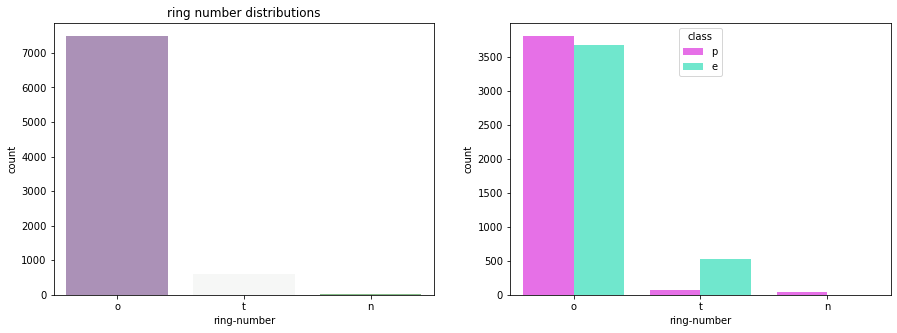

In [49]:
fig,axarr=plt.subplots(1,2,figsize=(15,5))
plot1=sns.countplot(data['ring-number'],ax=axarr[0],order=data['ring-number'].value_counts().index,palette="PRGn").set_title("ring number distributions")
plot2=sns.countplot(data=data,x="ring-number",hue="class",order=data['ring-number'].value_counts().index,palette=('#F95CFB','#5CFBD8')).set_ylabel('count')

### ring type

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


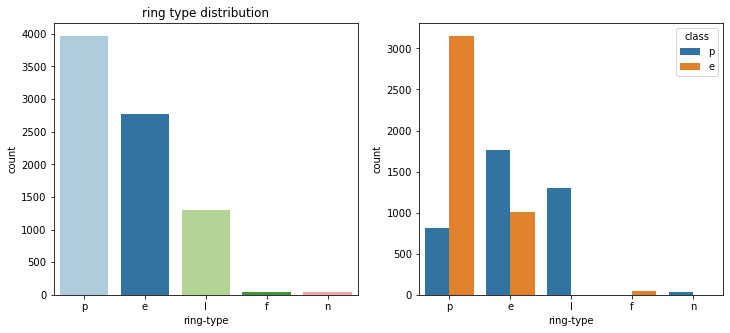

In [50]:
fig,axarr=plt.subplots(1,2,figsize=(12,5))
plot1=sns.countplot(data['ring-type'],ax=axarr[0],order=data['ring-type'].value_counts().index,palette="Paired").set_title("ring type distribution")
plot2=sns.countplot(data=data,ax=axarr[1],x="ring-type",hue="class",order=data['ring-type'].value_counts().index).set_ylabel

In [51]:
### P ring type is present as the majority in the dataset and most of them are edible

### Spore print color

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


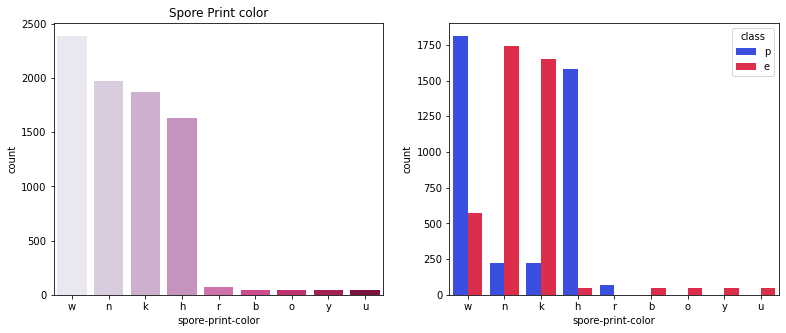

In [52]:
fig,axarr=plt.subplots(1,2,figsize=(13,5))
plot1=sns.countplot(data['spore-print-color'],ax=axarr[0],order=data['spore-print-color'].value_counts().index,palette="PuRd").set_title("Spore Print color")
plot2=sns.countplot(data=data,x="spore-print-color",hue="class",order=data['spore-print-color'].value_counts().index,palette=('#1F39FA','#F91036')).set_ylabel('count')

In [53]:
### W Spore print color has the highest poisonous type of shrooms and it has majority in the dataset.

### population

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


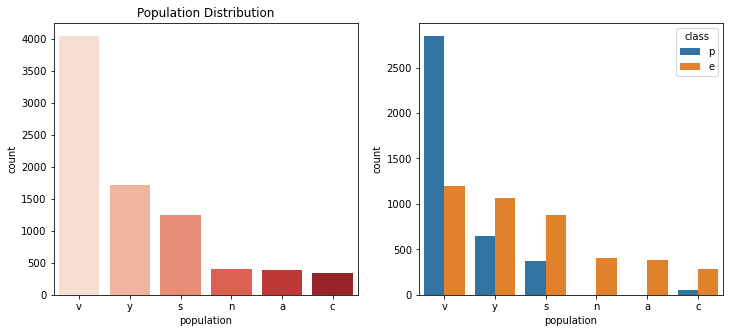

In [54]:
fig,axarr=plt.subplots(1,2,figsize=(12,5))
plot1=sns.countplot(data['population'],ax=axarr[0],order=data['population'].value_counts().index,palette="Reds").set_title("Population Distribution")
plot2=sns.countplot(data=data,x="population",hue="class",order=data['population'].value_counts().index).set_ylabel('count')

In [55]:
### v population mushrooms are majority poisonous and they are majority in the dataset as well.
### n and a population mushrooms are edible 

### Habitat

C:\Users\kanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


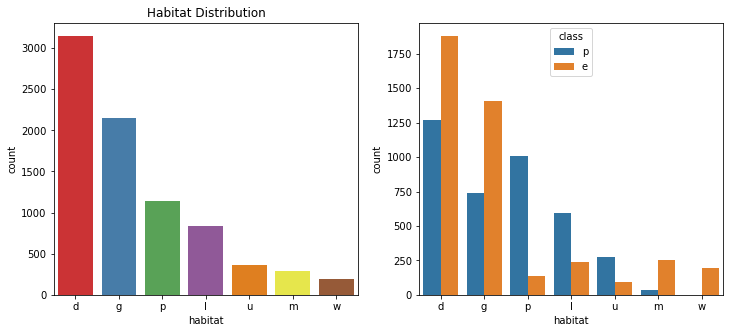

In [56]:
fig,axarr=plt.subplots(1,2,figsize=(12,5))
plot1=sns.countplot(data['habitat'],ax=axarr[0],order=data['habitat'].value_counts().index,palette="Set1").set_title("Habitat Distribution")
plot2=sns.countplot(data=data,x="habitat",hue="class",order=data['habitat'].value_counts().index).set_ylabel('count')

## Seperate our target feature

In [57]:
target=data["class"].values
mainsample=data.drop("class",axis=1)

In [58]:
mainsample.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [59]:
## Splirtting the data samples for training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(mainsample,target,test_size=0.3,random_state=42)

In [61]:
x_train_onehot=pd.get_dummies(x_train)
x_test_onehot=pd.get_dummies(x_test)

### Using Decision Tree Classifier to fit

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dc=DecisionTreeClassifier(criterion='entropy')

In [64]:
y_train_onehot=pd.get_dummies(y_train)
y_test_onehot=pd.get_dummies(y_test)

In [65]:
dc.fit(x_train_onehot,y_train_onehot)

DecisionTreeClassifier(criterion='entropy')

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [69]:
y_pred=dc.predict(x_test_onehot)
accuracy=accuracy_score(y_test_onehot,y_pred)*100

In [70]:
print(accuracy)

100.0


In [71]:
cr=classification_report(y_test_onehot,y_pred)

In [72]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438
 samples avg       1.00      1.00      1.00      2438



In [74]:
from sklearn.metrics import plot_confusion_matrix

### Using Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rfc=RandomForestClassifier()
rfc.fit(x_train_onehot,y_train_onehot)
rfc_predict=rfc.predict(x_test_onehot)

In [78]:
acc=accuracy_score(y_test_onehot,rfc_predict)

In [83]:
print(acc)

1.0
